In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Data

In [2]:
'''Loading Data from selected mortality dataset(only 15 columns)'''

df=[] #len=11, each = 1yr
for i in range(2005,2016):
    url = 'data/mortality_selected/'+str(i)+'.csv'
    df1 = pd.read_csv(url)
    df.append(df1)
    print('Loading data of year',i)
del df1
df[0][:1]

Loading data of year 2005
Loading data of year 2006
Loading data of year 2007
Loading data of year 2008
Loading data of year 2009
Loading data of year 2010
Loading data of year 2011
Loading data of year 2012
Loading data of year 2013
Loading data of year 2014
Loading data of year 2015


,education_1989_revision,education_2003_revision,education_reporting_flag,month_of_death,sex,detail_age,marital_status,day_of_week_of_death,current_data_year,injury_at_work,manner_of_death,activity_code,race,5y_age_band_recode,rankable_cause_recode
0,11.0,NaN,0,1,F,45,M,2,2005,U,7.0,NaN,1,10,4


# Month Vs Death Cause

In [3]:
#Generate dataframe to store data
month_dcause_dnumber_df = df[0].groupby(['month_of_death', 'rankable_cause_recode']).size().unstack()
for i in range(1,11):
    data =  df[i].groupby(['month_of_death', 'rankable_cause_recode']).size().unstack()
    data.fillna(0, inplace=True)
    month_dcause_dnumber_df += data
del data
month_dcause_dnumber_df = month_dcause_dnumber_df.astype(int)
month_dcause_dnumber_df

rankable_cause_recode,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
month_of_death,,,,,,,,,,,,,,,,,,,,,
1,561,43,9179,548170,76841,89522,645540,28179,138596,8248,...,11570,9853,2026,34022,460831,31793,86208,34360,15269,5079
2,493,34,8443,497651,69564,79900,584989,25584,124555,7434,...,10898,9172,1853,30609,414413,28872,79468,30921,12664,4695
3,573,47,8924,541164,72999,84495,620170,27208,132702,7942,...,12273,9828,1917,32510,445105,33033,84822,35668,14927,5281
4,512,36,8280,514663,66879,74958,565861,24829,122184,7135,...,12203,9129,1894,31154,403835,34416,80343,35570,15407,4833
5,506,34,8304,527753,66033,71719,557518,24472,120986,6836,...,12591,9164,1925,30227,393425,37355,83403,37140,16343,5104
6,494,35,7841,511324,62188,66426,520960,22987,111808,6352,...,12088,8719,1685,29074,368862,37522,83047,35939,16599,4948
7,506,38,8041,528679,63030,68136,530762,23555,113986,6387,...,12404,8759,1637,30237,377993,39650,88389,37149,17933,5258
8,513,24,8023,533188,62479,68984,520345,23438,114119,6354,...,12342,9104,1671,30217,378254,39683,85577,36952,17079,5096
9,464,34,7778,518497,61519,69893,511308,23050,113091,6168,...,11731,8675,1739,29426,374214,37353,79406,35833,15992,4794


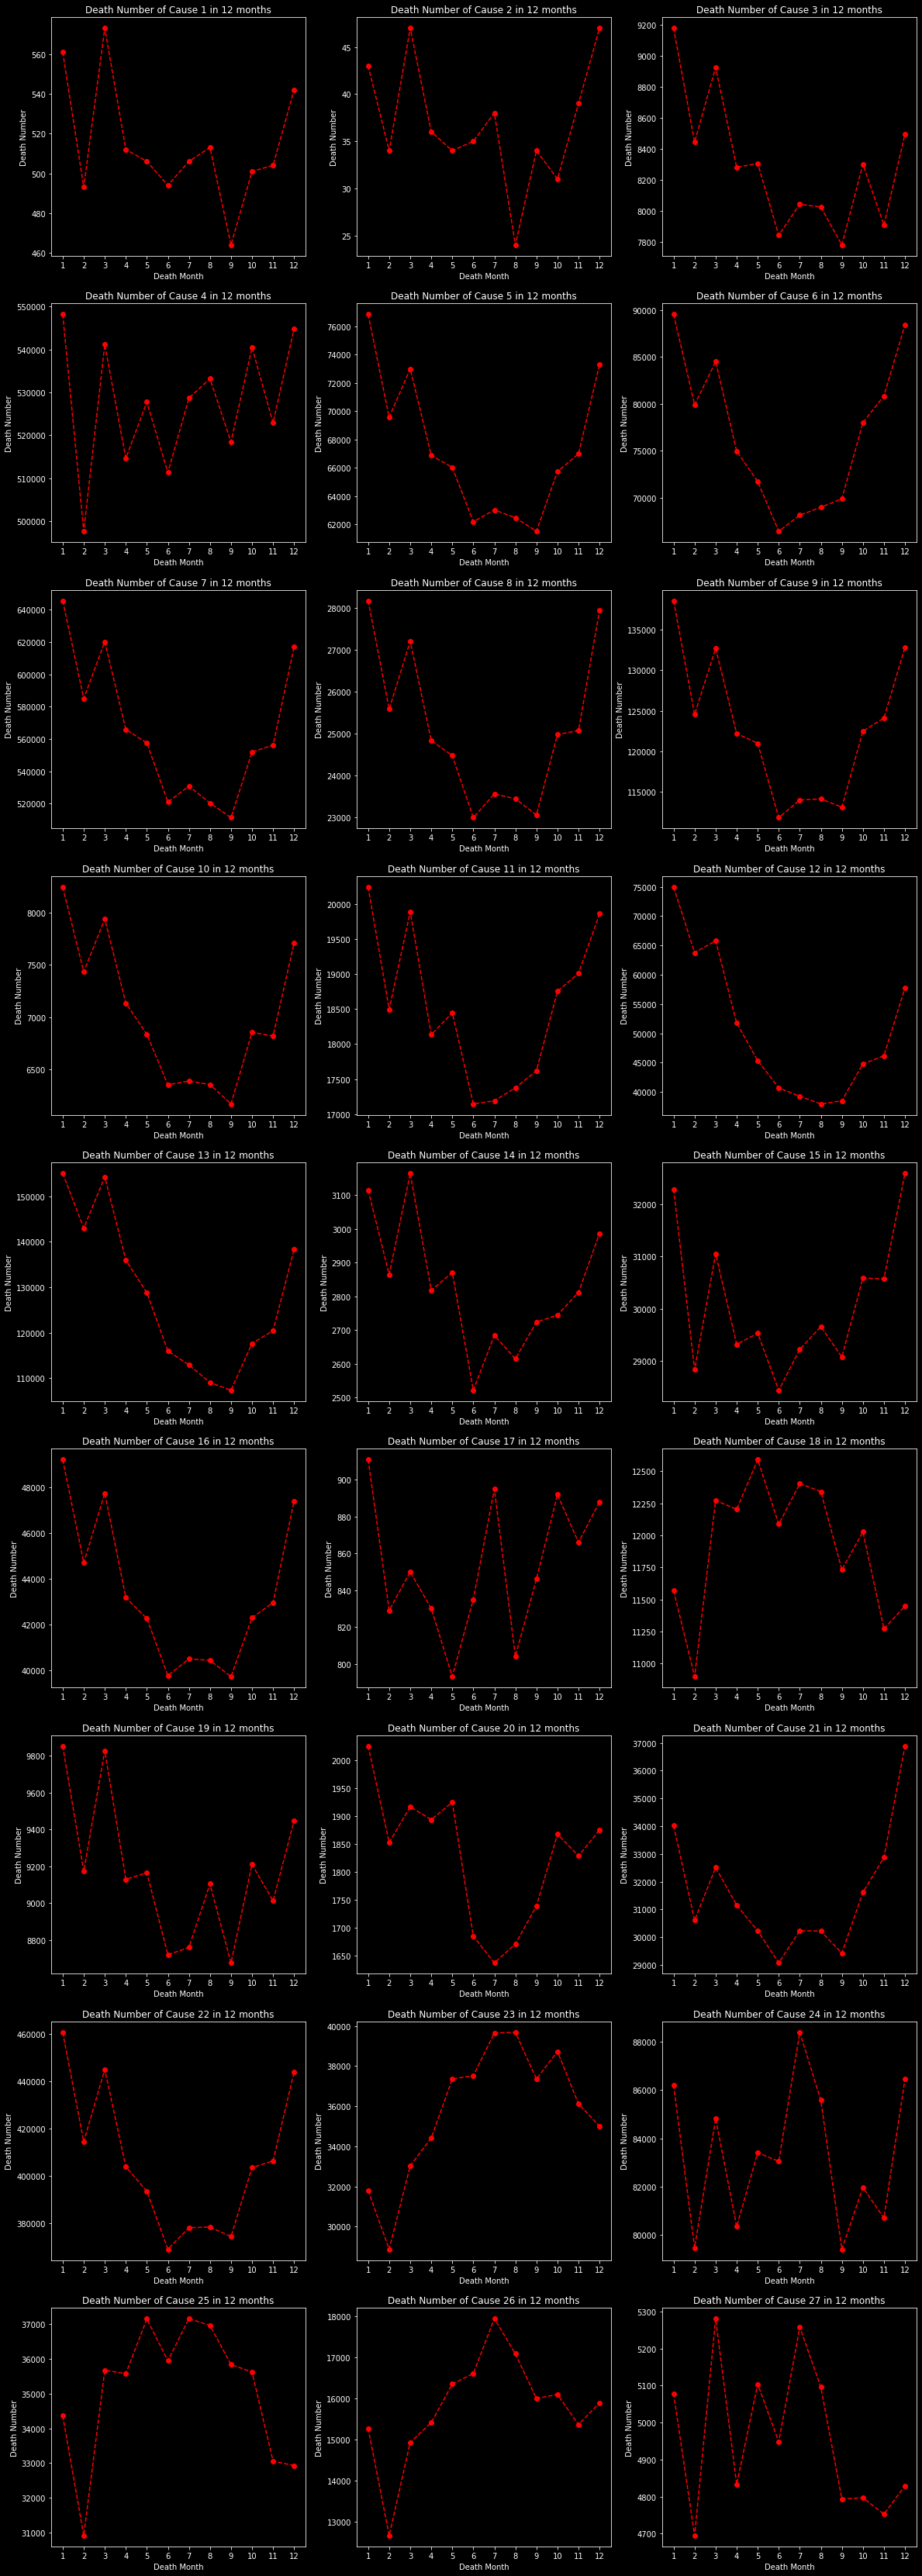

In [4]:
#plot
plt.figure(figsize=(20,60))
for i in range(27):
    plt.subplot(9,3,i+1)
    plt.plot(month_dcause_dnumber_df.index.values, month_dcause_dnumber_df[i+1],'o--r')
    plt.title('Death Number of Cause '+str(i+1)+' in 12 months')
    plt.xlabel('Death Month')
    plt.ylabel('Death Number')
    plt.xticks(np.arange(1,13))